# # Part 1 ‑ Exploratory data analysis
# The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [287]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')
from pandas import ExcelWriter
from pandas import ExcelFile
from datetime import datetime

In [288]:
#Reading the login file
login = pd.read_json('/Users/venkateshiyersubramanian/Documents/GitHub/Springboard/ultimate_challenge/logins.json')
login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [289]:
#Resampling for creation of 15 min interval:
login['login_15m'] = login['login_time'].dt.round('15min')
login = login.sort_values('login_time')

In [290]:
#Aggregate count of 15 mins interval
counted_login = login.groupby('login_15m').count()
counted_login['rollmean'] = counted_login.rolling(4).mean()

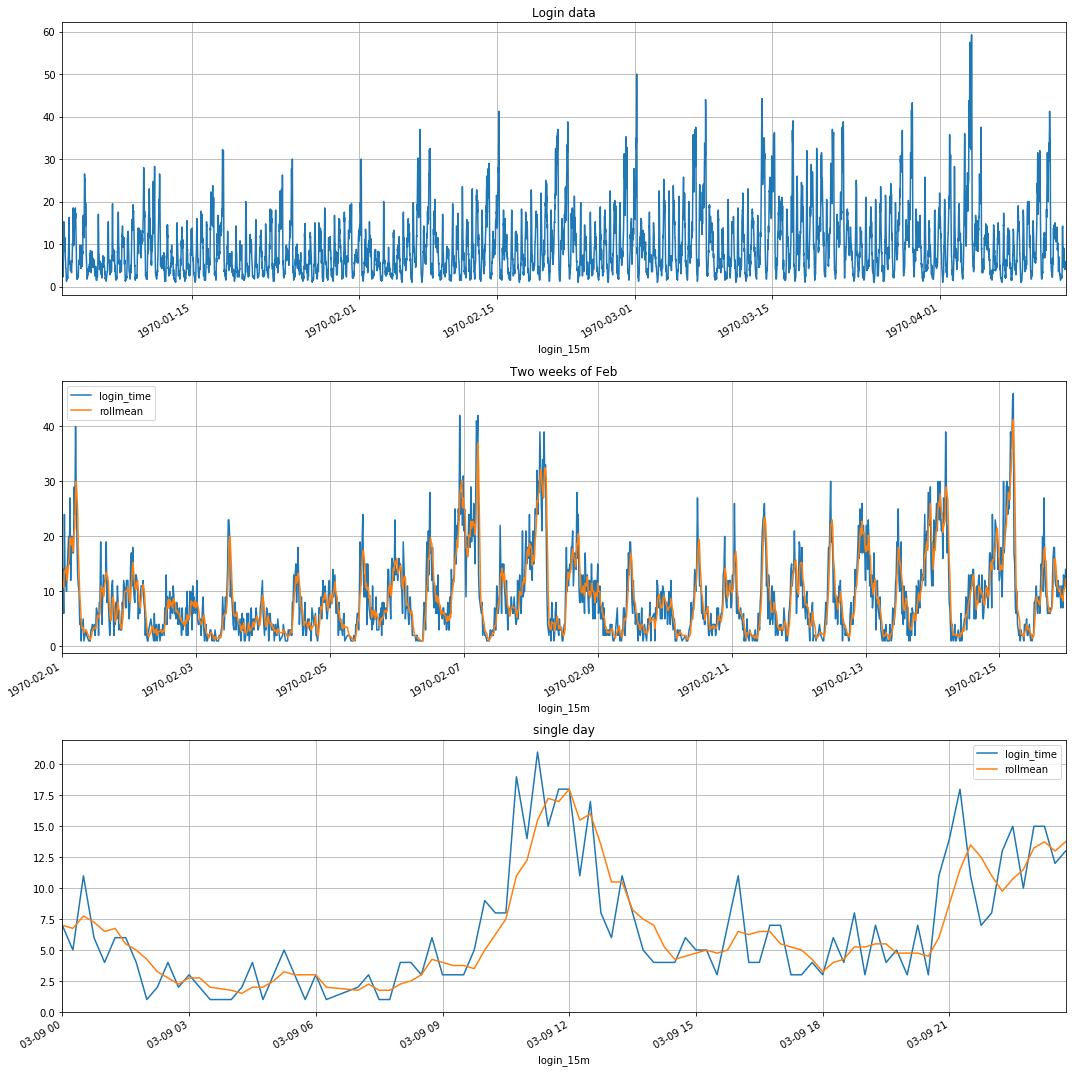

In [291]:
fig,axis = plt.subplots(3,1,figsize=[15,15])
counted_login['rollmean'].plot(ax=axis[0], title='Login data', grid=True)
counted_login.loc['1970-02-01':'1970-02-15'].plot(ax=axis[1], title='Two weeks of Feb', grid=True)
counted_login.loc['1970-03-09'].plot(ax=axis[2],title='single day', grid=True)
plt.tight_layout()

In [ ]:
#We observe the highest number of logins being around March 1st, 1970 and around first week of April. 

In [ ]:
# We can also see that the 15 mins interval for Feb which shows that there is a spike in demand on the 1st, 7th and 
# and 15th of the month. However the data for March shows similar peaks for the 9th of Mar

In [ ]:
#The sudden rise however is the single day observation on Mar 9th around 8 PM


Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

I would observe the percentage increase in number of rides/driver as the key measure of success; This will help us to check if reimbursing toll costs results in an overall increase in the number of rides per driver, which would ultimately mean an increase in Ultimate's revenue.

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a. how you will implement the experiment

b. what statistical test(s) you will conduct to verify the significance of the observation

c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

I would implement A/B testing with 2 sets of drivers: a test group and a control group. The test group would have all toll costs reimbursed while the control group would still have to pay their tolls. The null hypothesis is that there is no change in the number of rides between the test group and the control group. The alternative hypothesis is that the test group has more rides than the control group. I would test the statistical significane of the results using a 2-sample t-test with a 95% confidence interval (p-value of 0.05). If the null hypothesis is rejected and the alternative hypothesis, I would recommend the tolls be reimbursed. Otherwise, I would recommend against it.

In [245]:
# Downloading and reading the csv file
data = pd.read_csv("/Users/venkateshiyersubramanian/Documents/GitHub/Springboard/ultimate_challenge/Ultimate.csv")
pd.set_option('display.max_columns', None)
data.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [246]:
conda install -c conda-forge category_encoders

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [240]:
print(df['phone'].unique())

['iPhone' 'Android' nan]


In [247]:
#Converting in to a dataframe we see that the most missing values are in rating of a driver, phone and
#rating by driver
df = pd.DataFrame(data)
len(df) - df.count()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [248]:
#Imputing median values for avg rating of the driver & by the driver
data[['avg_rating_of_driver']] = data[['avg_rating_of_driver']].replace(0, np.NaN)
data[['avg_rating_by_driver']] = data[['avg_rating_by_driver']].replace(0, np.NaN)
# fill missing values with mean column values
data.fillna(data.median(), inplace=True)
# count the number of NaN values in each column
len(df)-df.count()

city                        0
trips_in_first_30_days      0
signup_date                 0
avg_rating_of_driver        0
avg_surge                   0
last_trip_date              0
phone                     396
surge_pct                   0
ultimate_black_user         0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver        0
dtype: int64

In [249]:
#We'll first convert the sign up date and last trip date in to datetime columns in order to get the max date:
df.lasttrip = pd.to_datetime(df.last_trip_date)
df.signup = pd.to_datetime(df.signup_date)

In [250]:
#Finding the max date to create benchmark for active users:
df.lasttrip.sort_values(ascending=False)[0]

Timestamp('2014-06-17 00:00:00')

In [251]:
#Calculating 30 days before the start time:
import datetime
s = '2014-06-17'
d = datetime.datetime.strptime(s, '%Y-%m-%d') - datetime.timedelta(days=30)
print(d.strftime('%m/%d/%Y'))

05/18/2014


In [252]:
# A user who has taken a trip post 05/18/2014 will be considered an Active user 
# and the one before this date will be considered Inactive


In [253]:
# Creating the target variable column:
df['active_or_not'] = (df.last_trip_date > '2014-05-17').astype(int)

In [254]:
# Droping the column last trip date to avoid multicollinearity issues:
#drop last_trip_date to avoid multicollinearity
df.drop(['last_trip_date'],axis=1,inplace=True)

In [255]:
# We have a three columns that we need to convert in to numerical values:city, phone, signup_date.
city_encoded = pd.get_dummies(df.city.apply(pd.Series).stack(),drop_first=True).sum(level=0)
df = df.join(city_encoded)

In [256]:
# One Hot Encoding
df = pd.get_dummies(df, columns=['phone'], prefix = ['Ph'])
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_or_not,King's Landing,Winterfell,Ph_Android,Ph_iPhone
0,King's Landing,4,2014-01-25,4.7,1.10,15.4,True,46.2,3.67,5.0,1,1,0,0,1
1,Astapor,0,2014-01-29,5.0,1.00,0.0,False,50.0,8.26,5.0,0,0,0,1,0
2,Astapor,3,2014-01-06,4.3,1.00,0.0,False,100.0,0.77,5.0,0,0,0,0,1
3,King's Landing,9,2014-01-10,4.6,1.14,20.0,True,80.0,2.36,4.9,1,1,0,0,1
4,Winterfell,14,2014-01-27,4.4,1.19,11.8,False,82.4,3.13,4.9,0,0,1,1,0


In [258]:
#Drop original iphone column and astapor column
df = df.drop(columns = ['city'])

In [259]:
#Convert ultimate_black_user from boolean to int
df['ultimate_black_user'] = df['ultimate_black_user'].astype('int')

In [260]:
# In order to use the signup_date, we will convert the date into weekday columns as this will help us understand 
# if the day a user signs up has any impact on their retention.
# #Extract date
# date = df[['signup_date']]
# date = date.set_index('signup_date')

In [261]:
#Extract signup day
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['signup_day'] = df['signup_date'].dt.weekday_name

In [262]:
#One hot encoding for Signup day
df = df.copy()
df = pd.get_dummies(df, columns=['signup_day'], prefix = ['signup'])
print(df.head())

   trips_in_first_30_days signup_date  avg_rating_of_driver  avg_surge  \
0                       4  2014-01-25                   4.7       1.10   
1                       0  2014-01-29                   5.0       1.00   
2                       3  2014-01-06                   4.3       1.00   
3                       9  2014-01-10                   4.6       1.14   
4                      14  2014-01-27                   4.4       1.19   

   surge_pct  ultimate_black_user  weekday_pct  avg_dist  \
0       15.4                    1         46.2      3.67   
1        0.0                    0         50.0      8.26   
2        0.0                    0        100.0      0.77   
3       20.0                    1         80.0      2.36   
4       11.8                    0         82.4      3.13   

   avg_rating_by_driver  active_or_not  King's Landing  Winterfell  \
0                   5.0              1               1           0   
1                   5.0              0               0

In [263]:
# Drop signup_date
df = df.drop(['signup_date'],axis=1)

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
trips_in_first_30_days    50000 non-null int64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null int64
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
active_or_not             50000 non-null int64
King's Landing            50000 non-null uint8
Winterfell                50000 non-null uint8
Ph_Android                50000 non-null uint8
Ph_iPhone                 50000 non-null uint8
signup_Friday             50000 non-null uint8
signup_Monday             50000 non-null uint8
signup_Saturday           50000 non-null uint8
signup_Sunday             50000 non-null uint8
signup_Thursday           50000 non-null uint8
signup_Tuesday            50000 n

In [265]:
#Convert all column names to lowercase and remove punctuations
df.columns = df.columns.str.replace(' ','_').str.lower()
df=df.rename(columns = {'''king's_landing''':'kings_landing'})

In [267]:
#Setting up column types as categorical
cat_columns = ['active_or_not','kings_landing','winterfell','ultimate_black_user']
for i in cat_columns:
    df[i] = df[i].astype('category')

In [268]:
df.reset_index(inplace=True,drop=True)

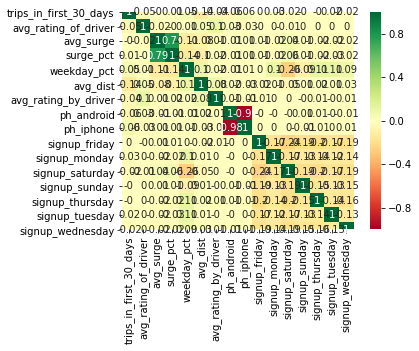

In [269]:
#First let's check for Multicollinearity issues in our columns:
_ = sns.heatmap(df.corr().round(2),square=True,annot=True,cmap='RdYlGn',vmin=-1, vmax=1)

In [ ]:
# The features avg_surge & surge_pct have hight correlation however it would be better to drop these features :


In [270]:
df = df.drop(columns=['avg_surge'])
df = df.drop(columns=['surge_pct'])

45.5 % of observed users were retained


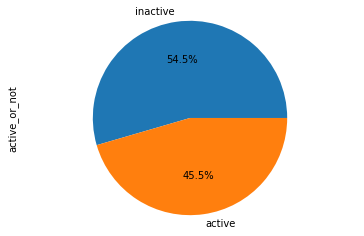

In [271]:
#% of users Active/Inactive:
print(format(df.active_or_not.astype('int').sum()/df.active_or_not.astype('int').count()*100,'1.1f'), '% of observed users were retained')
_ = df.active_or_not.value_counts().plot(kind='pie',labels=['inactive','active'],autopct='%1.1f%%')
_ = plt.axis('equal')

In [272]:
#We have quite a few numerical features which we need to scale:

from sklearn.preprocessing import MinMaxScaler

#Initialize scaler
scaler = MinMaxScaler() 
  
# Scaled features
df_transformed = scaler.fit_transform(df[['avg_dist', 'avg_rating_of_driver',
                                               'trips_in_first_30_days','weekday_pct']])

#Convert scaled features to dataframe
scaled_df = pd.DataFrame(df_transformed,columns=['avg_dist', 'avg_rating_of_driver', 'signup_day'
                                               'trips_in_first_30_days','weekday_pct'])
scaled_df.describe()

,avg_dist,avg_rating_of_driver,signup_daytrips_in_first_30_days,weekday_pct
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.036014,0.912509,0.018226,0.609261
std,0.035458,0.143900,0.030341,0.370815
min,0.000000,0.000000,0.000000,0.000000
25%,0.015035,0.875000,0.000000,0.333000
50%,0.024105,0.975000,0.008000,0.667000
75%,0.043116,1.000000,0.024000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [273]:
#Joining categorical and numerical columns:
cat_frame = df.drop(['avg_dist', 'avg_rating_of_driver',
                                               'trips_in_first_30_days','weekday_pct'],axis=1)
df_scaled = scaled_df.join(cat_frame)

In [274]:
df_scaled.head()

,avg_dist,avg_rating_of_driver,signup_daytrips_in_first_30_days,weekday_pct,ultimate_black_user,avg_rating_by_driver,active_or_not,kings_landing,winterfell,ph_android,ph_iphone,signup_friday,signup_monday,signup_saturday,signup_sunday,signup_thursday,signup_tuesday,signup_wednesday
0,0.022801,0.925,0.032,0.462,1,5.0,1,1,0,0,1,0,0,1,0,0,0,0
1,0.051317,1.000,0.000,0.500,0,5.0,0,0,0,1,0,0,0,0,0,0,0,1
2,0.004784,0.825,0.024,1.000,0,5.0,0,0,0,0,1,0,1,0,0,0,0,0
3,0.014662,0.900,0.072,0.800,1,4.9,1,1,0,0,1,1,0,0,0,0,0,0
4,0.019446,0.850,0.112,0.824,0,4.9,0,0,1,1,0,0,1,0,0,0,0,0


In [275]:
#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [279]:
# Defining X & Y 
X = df_scaled.drop(['active_or_not'],axis=1)
y = df_scaled['active_or_not']

In [277]:
#Split data into training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [280]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
logreg = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='multinomial').fit(X, y)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [281]:
#Predicting the accuracy of the logit regression on the test set:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.6716


In [285]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72      6788
           1       0.68      0.54      0.60      5712

    accuracy                           0.67     12500
   macro avg       0.67      0.66      0.66     12500
weighted avg       0.67      0.67      0.67     12500



In [283]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

# instantiate model to run 50 estimators on all processors
rf = RandomForestClassifier(n_estimators=100, random_state=42)

#Cross-validate on training se=-809\p
cv_accuracy_rf = cross_val_score(rf, X_train, y_train, cv=5,scoring='accuracy')

# train model
rf.fit(X_train, y_train)

# predict on test data
y_pred_rf = rf.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [284]:
print("Train Accuracy:",format(np.mean(cv_accuracy_rf),'.5f'))
print("Test Accuracy:",format(metrics.accuracy_score(y_test, y_pred_rf),'.5f'))
cnf_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_rf),
             columns = ['Predicted 0','Predicted 1'],
             index=['Actual 0','Actual 1'])
print('Confusion Matrix: ')
print(cnf_matrix)
print(classification_report(y_test, y_pred_rf))

Train Accuracy: 0.72971
Test Accuracy: 0.73424
Confusion Matrix: 
          Predicted 0  Predicted 1
Actual 0         5130         1658
Actual 1         1664         4048
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      6788
           1       0.71      0.71      0.71      5712

    accuracy                           0.73     12500
   macro avg       0.73      0.73      0.73     12500
weighted avg       0.73      0.73      0.73     12500



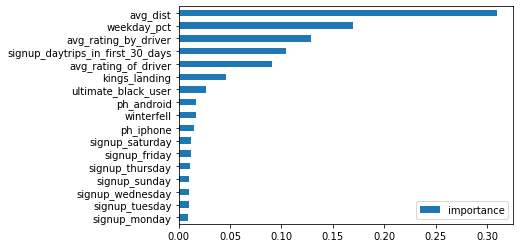

In [286]:
feature_importances_rf = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=True)

feature_importances_rf.plot(kind='barh')

In [ ]:
#We can clearly see that the avg distance followed by weekday percentage and avg rating by the driver are the top
#three features which impacts our target variable 